<style>
    @media print{
        body {
            position:relative !important;
        }
        .celltag_new_page {
            page-break-before: always !important;
        }
    }
</style>
# COMPSCI 371 Homework 6

Partners: Brian Janger, Matthew Wang, Caleb Watson

### Problem 0 (3 points)

## Part 1: Regularization in Logistic Regression Classification 

In [1]:
from urllib.request import urlretrieve
from os import path as osp


def retrieve(file_name, semester='fall22', course='371', homework=6):
    if osp.exists(file_name):
        print('Using previously downloaded file {}'.format(file_name))
    else:
        fmt = 'https://www2.cs.duke.edu/courses/{}/compsci{}/homework/{}/{}'
        url = fmt.format(semester, course, homework, file_name)
        urlretrieve(url, file_name)
        print('Downloaded file {}'.format(file_name))

In [2]:
import pickle

scalar_data_file = 'non_separable.pickle'
retrieve(scalar_data_file)
with open(scalar_data_file, 'rb') as file:
    scalar_data = pickle.load(file)
    
ad_data_file = 'ad.pickle'
retrieve(ad_data_file)
with open(ad_data_file, 'rb') as file:
    ad_data = pickle.load(file)

Using previously downloaded file non_separable.pickle
Using previously downloaded file ad.pickle


In [3]:
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

### Problem 1.1

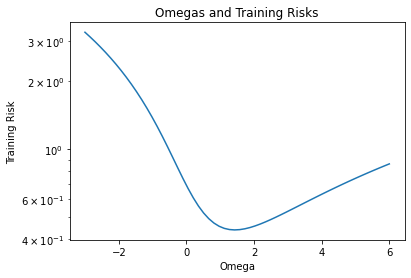

In [4]:
import numpy as np 

def alpha(beta, omega, x): 
    return beta + omega * x

def risk_function(x, y, omega):
    return np.log(1 + np.exp(-alpha(0, omega, x))) + (1 - y) * alpha(0, omega, x)

def plot_omegas_and_risks(data):
    omegas = np.linspace(-3, 6, 60)
    training_risks = []
    N = len(data['x'])

    for omega in omegas: 
        loss_sum = 0
        for i in range(0, N): 
            x = data['x'][i]
            y = data['y'][i]
            loss_sum += risk_function(x, y, omega)
        training_risks.append(loss_sum / N)

    plt.semilogy(omegas, training_risks)
    plt.title('Omegas and Training Risks')
    plt.xlabel('Omega')
    plt.ylabel('Training Risk')
    plt.show()

plot_omegas_and_risks(scalar_data)

### Problem 1.2

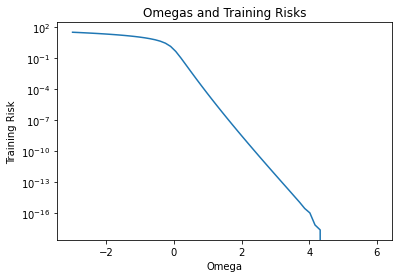

In [5]:
import copy 

seperable_data = copy.deepcopy(scalar_data)
for i in range(0, len(seperable_data['x'])):
    if seperable_data['y'][i] == 1: 
        seperable_data['x'][i] += 10
    else:
        seperable_data['x'][i] -= 10
        
plot_omegas_and_risks(seperable_data)

### Problem 1.3

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV

def train_and_test(data, cs=10000, folds=None, max_iter=10000):
    
    if isinstance(cs, int): 
        h = LogisticRegression(C=cs, max_iter=max_iter)     
        h.fit(data['train']['x'], data['train']['y'])
        
        for dataset in ('train', 'test'):
            accuracy = h.score(data[dataset]['x'], data[dataset]['y'])
            print('{} empirical_accuracy is {:.2f} percent'.format(dataset, accuracy * 100))
        return h
    
    else: 
        h = LogisticRegressionCV(Cs=cs, cv=folds, max_iter=max_iter)
        h.fit(data['train']['x'], data['train']['y'])
        
        for dataset in ('train', 'test'):
            accuracy = h.score(data[dataset]['x'], data[dataset]['y'])
            print('{} empirical_accuracy is {:.2f} percent'.format(dataset, accuracy * 100))
        return h


In [7]:
lrc = train_and_test(ad_data)

train empirical_accuracy is 99.41 percent
test empirical_accuracy is 94.83 percent


In [8]:
import numpy as np
import matplotlib.pyplot as plt

def analyze_cv(h):
    best_c, c_values, scores = h.C_[0], h.Cs_, h.scores_[1]
    best_index = np.where(c_values == best_c)[0][0]
    
    print('Best value of C: {}'.format(best_c))
    
    mean_scores = np.mean(scores, axis=0)
    error_scores = np.std(scores, axis=0)
    
    plt.plot(c_values, mean_scores)
    plt.errorbar(c_values, mean_scores, yerr = error_scores)
    plt.plot(best_c, mean_scores[best_index], 'ro')
    plt.gca().set_xscale('log')
    plt.show()    


train empirical_accuracy is 99.15 percent
test empirical_accuracy is 96.78 percent
Best value of C: 0.1


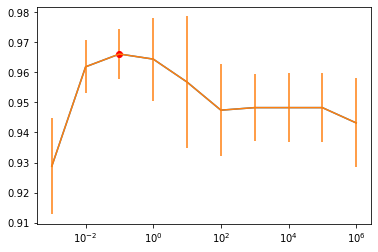

In [9]:
c_candidates = np.logspace(-3, 6, num=10)
lrc = train_and_test(ad_data, c_candidates, folds=5)
analyze_cv(lrc)

## Part 2: The Bootstrap

In [10]:
times_file = 'times.pickle'
retrieve(times_file)
with open(times_file, 'rb') as file:
    times = pickle.load(file)
n = len(times)

Using previously downloaded file times.pickle


In [11]:
m_hat = np.mean(times)
print('estimated wait time {:.4f} seconds'.format(m_hat))

estimated wait time 13.1083 seconds


### Problem 2.1

In [12]:
def bootstrap(data, sample_size=None, iterations=10000, replace=True):
    if sample_size is None: sample_size=len(data)
    means = []
    for i in range(1,iterations):
        if replace is True:        # selection with replacement
            means.append(np.mean(np.random.choice(data, size=sample_size, replace=True)))
        else:                   # selection without replacement
            means.append(np.mean(np.random.choice(data, size=sample_size, replace=False)))
    return np.mean(np.array(means)), np.std(np.array(means))


m_b, std_b = bootstrap(times)
print('Using the bootstrap method, the estimated mean wait time is {:.4f} seconds'.format(m_b)
      + ' and the standard deviation is {:.4f} seconds.'.format(std_b))

Using the bootstrap method, the estimated mean wait time is 13.0973 seconds and the standard deviation is 1.2373 seconds.


### Problem 2.2 (Exam Style)

When reporting the estimates from the bootstrap method to our boss, we would opt to report to the nearest integer. After running several iterations of the bootstrap method, each the values of the estimated mean begin to disagree starting at the first decimal place therefore preventing additional precision to confidently be reported. 

### Problem 2.3

In [13]:
m_lambda = 12.5000
m_times = np.mean(times)
m_b = bootstrap(times)[0]

print('The true mean of p(t) is {:.4f} seconds.'.format(m_lambda))
print('The empirical average of the entire set times is {:.4f} seconds.'.format(m_times))
print('The empirical average computed by bootstrap is {:.4f} seconds.'.format(m_b))

The true mean of p(t) is 12.5000 seconds.
The empirical average of the entire set times is 13.1083 seconds.
The empirical average computed by bootstrap is 13.1214 seconds.


### Problem 2.4 (Exam Style)

The empirical averages are more similar to one another than the true mean of the exponential distribution p(t), which makes sense given they are derived from the same subarray of times as opposed to the entire underlying probability distirbution for all time values greater than zero. Given this, as the subarray of times begins to increase in size, we would expect the empirical and true values to approach one another - however, since we are using a smaller array of times, we see that the true mean and the empirical average of the set are different from one another.

### Problem 2.5

In [14]:
import math
sd_lambda = 12.5000
sd_times = np.std(times)
sd_p = 12.5000 / math.sqrt(n)
sd_b = bootstrap(times)[1]

print('The true standard deviation of p(t) is {:.4f} seconds.'.format(sd_lambda))
print('The empirical standard deviation of the entire set times is {:.4f} seconds.'.format(sd_times))
print('The true standard deviation of a sample of N numbers out of p(t) is {:.4f} seconds.'.format(sd_p))
print('The empirical standard deviation computed by bootstrap is {:.4f} seconds.'.format(sd_b))

The true standard deviation of p(t) is 12.5000 seconds.
The empirical standard deviation of the entire set times is 12.4875 seconds.
The true standard deviation of a sample of N numbers out of p(t) is 1.2500 seconds.
The empirical standard deviation computed by bootstrap is 1.2469 seconds.


### Problem 2.6

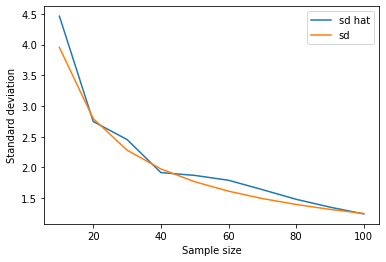

In [15]:
sample_size = [i for i in range(10, 110, 10)]
sd_hat = []
sd = []
for k in sample_size:    
    sd_hat.append(bootstrap(times[0:k], replace=True)[1])
    sd.append(12.5/math.sqrt(k))

def plot(x, y, labels):
    for value in range(len(y)):
        plt.plot(x, y[value], label=labels[value])
    plt.xlabel('Sample size')
    plt.ylabel('Standard deviation')
    plt.legend()
    
plot(sample_size, [sd_hat, sd], ['sd hat', 'sd'])

### Problem 2.7 (Exam Style Except for the Code)

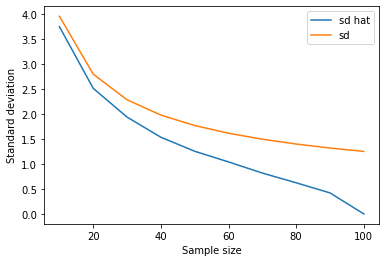

In [16]:
sd_hat = []
for k in sample_size: 
    sd_hat.append(bootstrap(times, sample_size=k, replace=False)[1])
plot(sample_size, [sd_hat, sd], ['sd hat', 'sd'])

As the results above show, the bootstrap continues to underestimate the true value for the standard deviation more and more as k increases from 10 to 100 samples. 

We know from the problem description that the times array has a length of $N$=100. When we do the bootstrap (without replacement) on the array times for a small number of samples, $k$, we see that the standard deviations are fairly close to each other. As the value of $k$ increases, we must observe that sampling without replacement must cause the proper sets $T_k$ of $T$ to be more alike each other. We can even see that in the case where $k$=100, the empirical standard deviation computed by this version of the bootstrap is zero - this is because every set $T_k$ will be the exact same set as we will have the same 100 values from the 100 values in the times array. Every mean of the sets $T_k$ will be the same and thus, the standard deviation is zero. Note that this is the extreme case, but we can use this observation to show that the sets $T_k$ will be more alike each other when we increase $k$ in bootstrapping without replacement, which causes the means to be more alike (as the sets become more alike with more overlapping/similar values) and thus lowering the standard deviation further from the true standard deviation (which is calculated from the infinite number of possible samples of $k$ values from the probability density function - since we aren't limited on the size of the set we are sampling from, the samples will be more alike the actual probability distribution and we will thus have an increasingly greater standard deviation difference with higher $k$). 